In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
'''
Definitions of the 7 classes present in the dataset

Gene Family                    Class Label
G protien coupled receptors         0
Tyrosine kinase                     1
Tyrosine phosphate                  2
Synthetase                          3
Synthase                            4
Ion Channel                         5


'''
# input all data 
human = pd.read_table(r'datasets\human_data.txt')
chimp = pd.read_table(r'datasets\chimp_data.txt')
dog = pd.read_table(r'datasets\dog_data.txt')
# display
print(human.head())
print(chimp.head())
print(dog.head())


                                            sequence  class
0  ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...      4
1  ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...      4
2  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
3  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
4  ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...      3
                                            sequence  class
0  ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...      4
1  ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...      4
2  ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...      4
3  ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...      4
4  ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...      6
                                            sequence  class
0  ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...      4
1  ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...      4
2  ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...      6
3  ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACG

In [6]:
def getKmers(sequence, size=6):
    ''' 
    a function to find all possible overlapping k-mer of length 6 from 
    a sequence

    Params:
    - sequence -> the input DNA sequence
    - size -> the length of each k-mer. Defaut is 6

    Returns:
    - list -> a list of overlapping lmers 
    '''
    num_positions = len(sequence) - size + 1
    kmers = []

    for i in range (num_positions):
        kmer = sequence[i:i+size].lower()
        kmers.append(kmer)
    
    return kmers

        
human['words']= human.apply(lambda x: getKmers(x['sequence']), axis=1)
human = human.drop('sequence', axis=1)
chimp['words'] = chimp.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp = chimp.drop('sequence', axis=1)
dog['words'] = dog.apply(lambda x: getKmers(x['sequence']), axis=1)
dog = dog.drop('sequence', axis=1)

# display
print(human.head())
print(chimp.head())
print(dog.head())

   class                                              words
0      4  [atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...
1      4  [atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...
2      3  [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...
3      3  [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...
4      3  [atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc...
   class                                              words
0      4  [atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...
1      4  [atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...
2      4  [atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc...
3      4  [atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc...
4      6  [atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg...
   class                                              words
0      4  [atgcca, tgccac, gccaca, ccacag, cacagc, acagc...
1      4  [atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...
2      6  [atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac...
3      6  [atgtgc, tgtgca, gtgcac, tgcac

In [7]:
# combining the sequences 
human_text = list(human['words'])
for x in range(len(human_text)):
    human_text[x] = " ".join(human_text[x])
y_data = human.iloc[:,0].values

chimp_text = list(chimp['words'])
for x in range(len(chimp_text)):
    chimp_text[x] = " ".join(chimp_text[x])
y_data_chimp = chimp.iloc[:, 0].values

dog_text = list(dog['words'])
for x in range(len(dog_text)):
    dog_text[x] = " ".join(dog_text[x])
y_data_dog = dog.iloc[:, 0].values

# bag or words with countvectorizer 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
x = cv.fit_transform(human_text)
x_chimp = cv.fit_transform(chimp_text)
x_dog = cv.fit_transform(dog_text)

In [8]:
print (x.shape)
print(x_chimp.shape)
print(x_dog.shape)

(4380, 232414)
(1682, 229684)
(820, 227149)


<Axes: xlabel='class'>

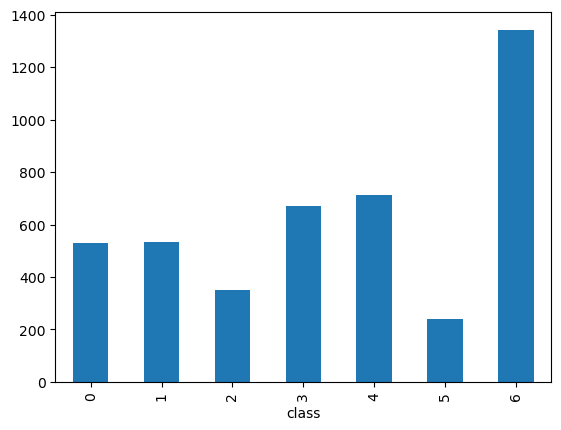

In [9]:
# checking class balance 
human['class'].value_counts().sort_index().plot.bar()

<Axes: xlabel='class'>

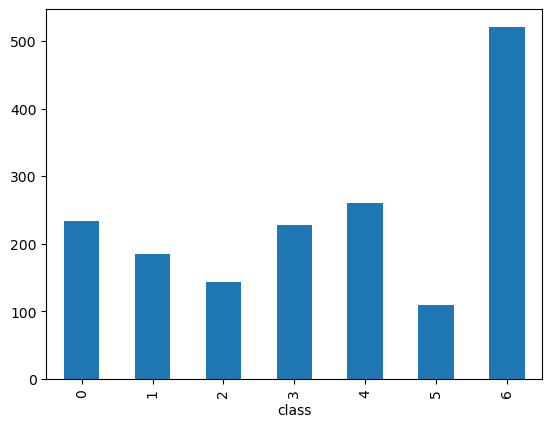

In [10]:
chimp['class'].value_counts().sort_index().plot.bar()

<Axes: xlabel='class'>

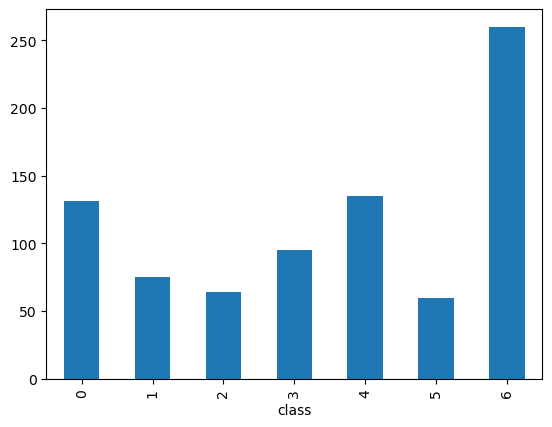

In [11]:
dog['class'].value_counts().sort_index().plot.bar()

In [28]:
# splitting into training and testing set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y_data, test_size =.20,random_state=42)
X_train_chimp, X_test_chimp, y_train_chimp, y_test_chimp = train_test_split(x_chimp,y_data_chimp, test_size =.20,random_state=42)
X_train_dog, X_test_dog, y_train_dog, y_test_dog = train_test_split(x_dog,y_data_dog, test_size =.20,random_state=42)

In [29]:
print(X_train.shape)
print(X_test.shape)

print(X_train_chimp.shape)
print(X_test_chimp.shape)

print(X_train_dog.shape)
print(X_test_dog.shape)

(3504, 232414)
(876, 232414)
(1345, 229684)
(337, 229684)
(656, 227149)
(164, 227149)


In [37]:
# multinominal naive bayees classifier 
# alpha parameter tuning using grid search 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0]
}
classifier = MultinomialNB()

grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           verbose=1)

print("Human dataset")
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

print("Chimp dataset")
grid_search.fit(X_train_chimp, y_train_chimp)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

print("Dog dataset")
grid_search.fit(X_train_dog, y_train_dog)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Human dataset
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found:  {'alpha': 0.5}
Best cross-validation score:  0.9629007540248624
Chimp dataset
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found:  {'alpha': 2.0}
Best cross-validation score:  0.8921933085501859
Dog dataset
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found:  {'alpha': 0.1}
Best cross-validation score:  0.6906083738144806


In [38]:
# using the alpha parameter determined from grid search 
classifier = MultinomialNB(alpha=0.5)
classifier.fit(X_train , y_train)

MultinomialNB(alpha=0.5)

In [39]:
classifier_chimp = MultinomialNB(alpha=2.0)
classifier_chimp.fit(X_train_chimp , y_train_chimp)

MultinomialNB(alpha=2.0)

In [40]:
classifier_dog = MultinomialNB(alpha=0.1)
classifier_dog.fit(X_train_dog , y_train_dog)

MultinomialNB(alpha=0.1)

In [41]:
y_pred = classifier.predict(X_test)
y_pred_chimp = classifier_chimp.predict(X_test_chimp)
y_pred_dog = classifier_dog.predict(X_test_dog)

In [42]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def get_metrics(y_test, y_predicted):
    acc = accuracy_score(y_test, y_predicted)
    precision= precision_score(y_test, y_predicted, average= "weighted")
    recall = recall_score(y_test, y_predicted, average="weighted")
    f1=f1_score(y_test,y_predicted, average="weighted")

    return acc, precision, recall, f1

print("Confusion Matrix for Human Dataset")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred, name="Predicted")))
acc, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" %(acc, precision, recall, f1))

print("Confusion Matrix for Chimp Dataset")
print(pd.crosstab(pd.Series(y_test_chimp,name="Actual"),pd.Series(y_pred_chimp, name="Predicted")))
acc, precision, recall, f1 = get_metrics(y_test_chimp, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" %(acc, precision, recall, f1))

print("Confusion Matrix for Dog Dataset")
print(pd.crosstab(pd.Series(y_test_dog,name="Actual"),pd.Series(y_pred_dog, name="Predicted")))
acc, precision, recall, f1 = get_metrics(y_test_dog, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" %(acc, precision, recall, f1))

Confusion Matrix for Human Dataset
Predicted    0    1   2    3    4   5    6
Actual                                    
0          100    0   0    0    2   0    0
1            0  104   0    0    0   0    2
2            0    0  78    0    0   0    0
3            0    0   0  124    1   0    0
4            0    0   0    0  146   0    3
5            0    0   0    0    0  51    0
6            1    0   0    1    2   0  261
accuracy = 0.986 
precision = 0.986 
recall = 0.986 
f1 = 0.986
Confusion Matrix for Chimp Dataset
Predicted   0   1   2   3   4   5    6
Actual                                
0          25   0   0   0   0   3    0
1           0  38   0   1   0   0    0
2           0   0  26   0   0   0    1
3           1   0   0  41   1   0    0
4           0   1   0   5  44   0    2
5           4   0   0   1   0  22    2
6           0   0   0   5   0   0  114
accuracy = 0.920 
precision = 0.926 
recall = 0.920 
f1 = 0.920
Confusion Matrix for Dog Dataset
Predicted   0   1   2  3  4  5 